# 資料預處理

In [1]:
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt


from my_plot import plot_single, plot_batch, show_train_history, plot_images_labels_prediction, plot_image, plot_value_array


Using TensorFlow backend.


In [2]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

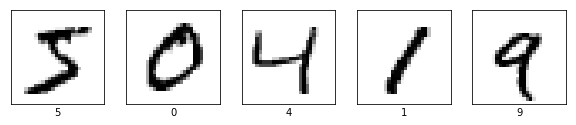

In [3]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
plot_batch(train_images, train_labels,class_names ,5)

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
train_labels.shape

(60000,)

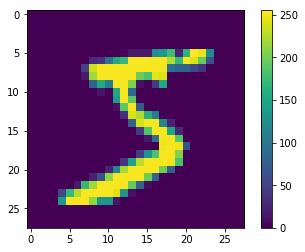

In [6]:
plot_single(train_images[0])

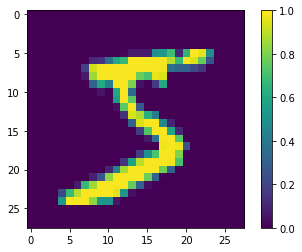

In [7]:
train_images = train_images / 255.0
test_images = test_images / 255.0
plot_single(train_images[0])

# 建立模型

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
import tensorflow as tf

In [9]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(256, activation=tf.nn.relu, kernel_initializer='normal'))
model.add(Dropout(0.5))
model.add(Dense(10, activation=tf.nn.softmax, kernel_initializer='normal'))

In [10]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


# 訓練模型

In [12]:
train_history = model.fit(train_images, train_labels, validation_split=0.2, 
                         epochs=10, batch_size=200,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 1s - loss: 0.5491 - acc: 0.8416 - val_loss: 0.2360 - val_acc: 0.9343
Epoch 2/10
 - 1s - loss: 0.2526 - acc: 0.9273 - val_loss: 0.1695 - val_acc: 0.9531
Epoch 3/10
 - 1s - loss: 0.1971 - acc: 0.9431 - val_loss: 0.1374 - val_acc: 0.9615
Epoch 4/10
 - 1s - loss: 0.1624 - acc: 0.9532 - val_loss: 0.1209 - val_acc: 0.9663
Epoch 5/10
 - 1s - loss: 0.1440 - acc: 0.9577 - val_loss: 0.1065 - val_acc: 0.9699
Epoch 6/10
 - 1s - loss: 0.1229 - acc: 0.9640 - val_loss: 0.0985 - val_acc: 0.9708
Epoch 7/10
 - 1s - loss: 0.1115 - acc: 0.9660 - val_loss: 0.0917 - val_acc: 0.9733
Epoch 8/10
 - 1s - loss: 0.1037 - acc: 0.9696 - val_loss: 0.0887 - val_acc: 0.9737
Epoch 9/10
 - 1s - loss: 0.0957 - acc: 0.9709 - val_loss: 0.0870 - val_acc: 0.9743
Epoch 10/10
 - 1s - loss: 0.0894 - acc: 0.9729 - val_loss: 0.0804 - val_acc: 0.9758


# 以圖形顯示訓練過程

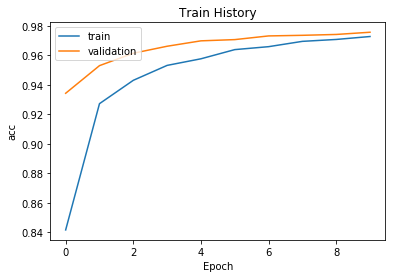

In [13]:
show_train_history(train_history,'acc','val_acc')

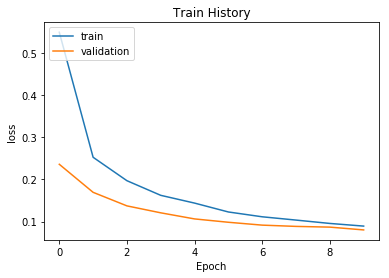

In [14]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [15]:
scores = model.evaluate(test_images, test_labels)
print("Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))

10000/10000 [==============================] - 0s 14us/step
Accuracy of testing data = 97.5%


# 進行預測

In [16]:
prediction=model.predict_classes(test_images)

In [17]:
prediction

array([7, 2, 1, ..., 4, 5, 6])

In [18]:
predictions = model.predict(test_images)
predictions[0]

array([1.12324514e-07, 1.79223374e-08, 1.83337725e-05, 2.23258874e-04,
       1.34376454e-10, 3.63122268e-07, 6.51263006e-13, 9.99749482e-01,
       1.64449943e-07, 8.26378891e-06], dtype=float32)

In [19]:
np.argmax(predictions[0])

7

In [20]:
test_labels[0]

7

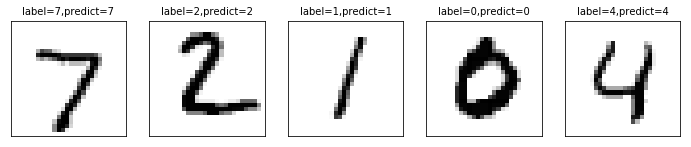

In [21]:
plot_images_labels_prediction(test_images,test_labels, prediction,idx=0,num=5)

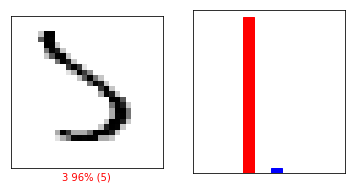

In [23]:
i = 1393
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images,class_names)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

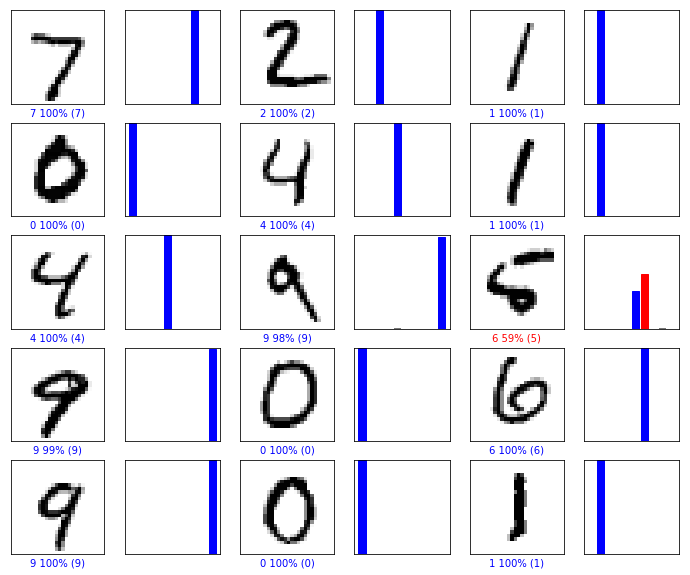

In [24]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images, class_names)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)


# confusion matrix

In [25]:
import pandas as pd
pd.crosstab(test_labels,prediction, rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,968,0,1,3,2,1,3,1,1,0
1,0,1124,3,1,0,1,3,0,3,0
2,4,1,1002,4,4,0,2,8,6,1
3,1,0,5,985,0,3,0,8,5,3
4,0,0,4,0,963,0,4,3,2,6
5,3,0,0,11,2,861,6,1,5,3
6,5,3,0,1,5,3,936,0,5,0
7,1,6,10,1,0,0,0,1002,1,7
8,4,0,1,7,7,3,2,7,941,2


In [26]:
df = pd.DataFrame({'label':test_labels, 'predict':prediction})
df[:2]

,label,predict
0,7,7
1,2,2


In [27]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1393,5,3
2035,5,3
2810,5,3
3702,5,3
3902,5,3
4255,5,3
4271,5,3
4360,5,3
5937,5,3


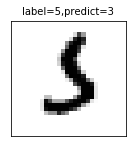

In [28]:
plot_images_labels_prediction(test_images,test_labels,prediction,idx=340,num=1)

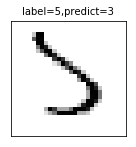

In [29]:
plot_images_labels_prediction(test_images,test_labels,prediction,idx=1393,num=1)

# 針對位移過的圖進行預測

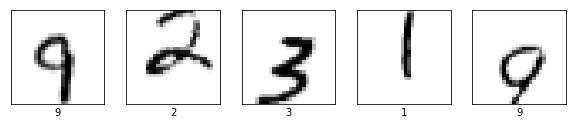

In [33]:
from my_plot import generate_shift_mnist_data

shift_img, shift_img_label = generate_shift_mnist_data(10000)
plot_batch(shift_img, shift_img_label,class_names, 5)

In [34]:
scores = model.evaluate(shift_img, shift_img_label)
print("Accuracy of generated shift data = {:2.1f}%".format(scores[1]*100.0))

10000/10000 [==============================] - 0s 14us/step
Accuracy of generated shift data = 51.9%
